In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# **Data Cleaning**

In [97]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/your_dataset - your_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# Handling missing values
df.fillna(value=0, inplace=True)  # Replace missing values with 0
# Alternatively, you can use forward-fill or backward-fill to propagate the previous or next value respectively:
# df.fillna(method='ffill', inplace=True)  # Forward-fill missing values
# df.fillna(method='bfill', inplace=True)  # Backward-fill missing values

In [99]:
# Removing duplicates
df.drop_duplicates(inplace=True)


In [100]:
# Correcting inconsistencies
# Assuming you want to correct a column named 'inconsistent_column' by replacing 'wrong_value' with 'correct_value'
#df['inconsistent_column'] = df['inconsistent_column'].replace('wrong_value', 'correct_value')
if 'inconsistent_column' not in df.columns:
    df.insert(0, 'inconsistent_column', 'wrong_value')
df['inconsistent_column'] = df['inconsistent_column'].replace('wrong_value', 'correct_value')

In [101]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [10]:
# Summary statistics
print(df.describe())

        product_ID  quantity_sold  sales_price  customer_id          age  \
count  1094.000000    1094.000000  1096.000000  1096.000000  1096.000000   
mean     25.644424     121.383912    69.321168    12.961679    40.343066   
std      12.254867     167.717350    78.228076     7.199213    13.737826   
min      11.000000       7.000000     7.000000     1.000000    23.000000   
25%      17.000000      33.000000    26.000000     7.000000    29.000000   
50%      26.000000      51.000000    44.000000    13.000000    36.000000   
75%      32.750000     112.000000    74.000000    19.000000    52.000000   
max      51.000000     643.000000   323.000000    25.000000    65.000000   

       purchase_frequency  total_purchase_amount  
count         1096.000000            1093.000000  
mean             4.647810            3371.989936  
std              2.512808            1672.811649  
min              1.000000            1132.000000  
25%              2.000000            2255.000000  
50%      

In [102]:
# Sales trends over time
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime type
df['year'] = df['date'].dt.year  # Extract year from 'date'
df['month'] = df['date'].dt.month  # Extract month from 'date'
df['day'] = df['date'].dt.day  # Extract day from 'date'


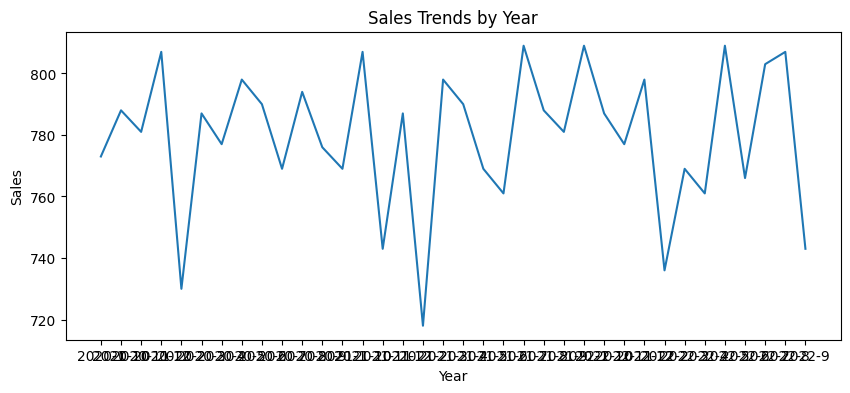

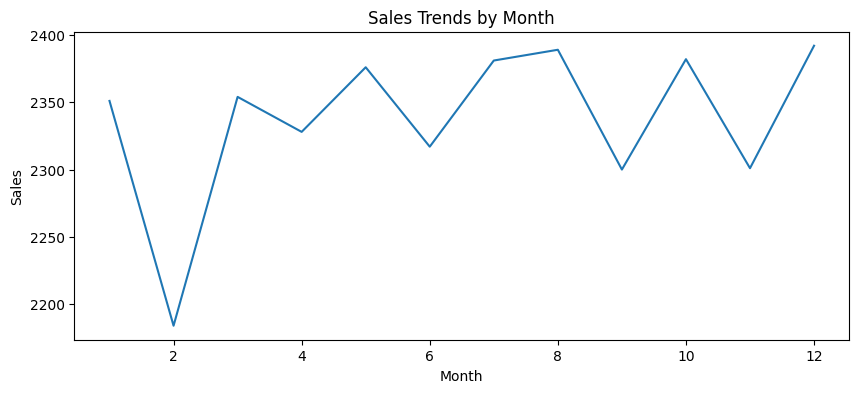

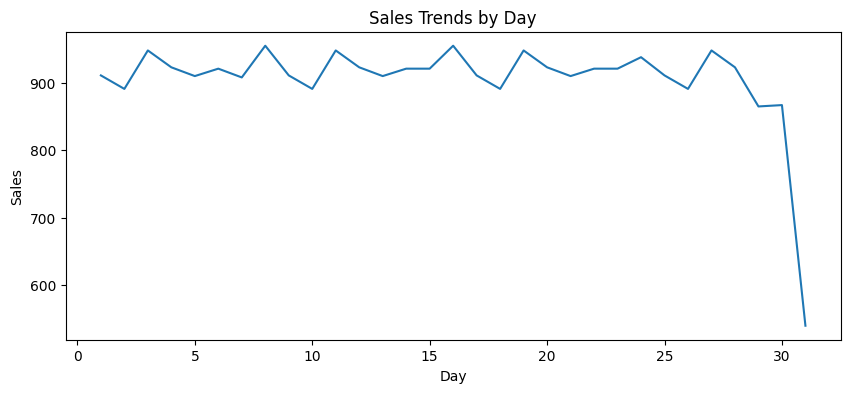

In [108]:
# Plotting sales
sales_by_year = df.groupby('year_new')['product_ID'].sum()
plt.figure(figsize=(10, 4))
plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year')
plt.show()

sales_by_month = df.groupby('month')['product_ID'].sum()
plt.figure(figsize=(10, 4))
plt.plot(sales_by_month.index, sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trends by Month')
plt.show()

sales_by_day = df.groupby('day')['product_ID'].sum()
plt.figure(figsize=(10, 4))
plt.plot(sales_by_day.index, sales_by_day.values)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales Trends by Day')
plt.show()

In [104]:
# Customer behavior analysis
customer_count = df['customer_id'].nunique()
average_purchase = df.groupby('customer_id')['sales'].mean()

print("Total number of customers:", customer_count)
print("Average purchase by customer:\n", average_purchase)


Total number of customers: 25
Average purchase by customer:
 customer_id
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
Name: sales, dtype: float64


In [105]:
# Popular products
popular_products = df['product_ID'].value_counts().head(10)

print("Top 10 popular products:\n", popular_products)

Top 10 popular products:
 22.0    137
32.0    137
11.0    137
33.0    137
26.0    137
51.0    137
17.0    136
13.0    136
0.0       2
Name: product_ID, dtype: int64


# **Data Visualization**

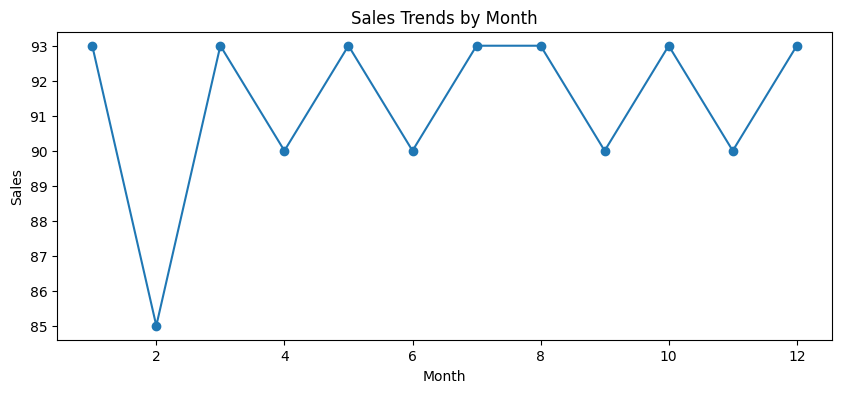

In [32]:
# Sales trends over time (line plot)
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime type
df['year'] = df['date'].dt.year  # Extract year from 'date'
df['month'] = df['date'].dt.month  # Extract month from 'date'
sales_by_month = df.groupby('month')['sales'].sum()

plt.figure(figsize=(10, 4))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trends by Month')
plt.show()

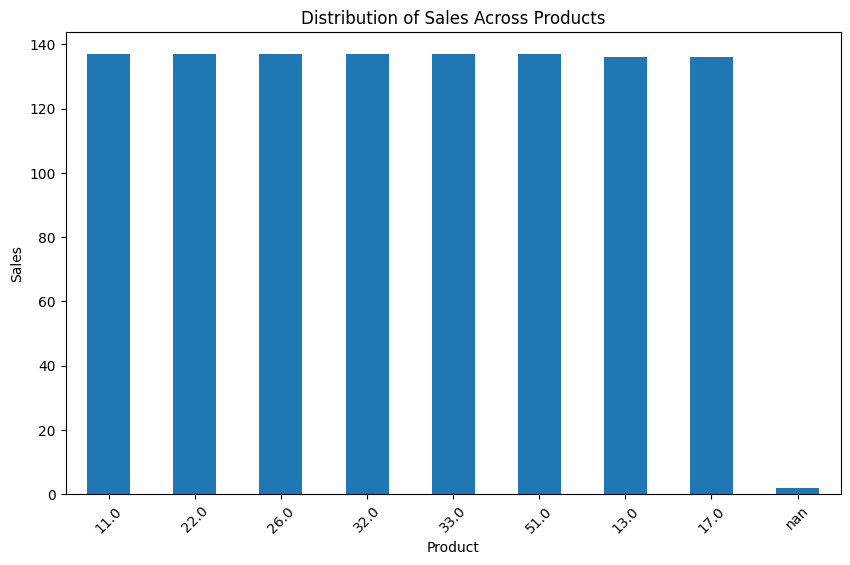

In [42]:
# Distribution of sales across products (bar plot)
df['product_ID'] = df['product_ID'].astype(str)
df['product'] = df['product_ID'].str.split('-').str[0]
sales_by_product = df.groupby('product')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_by_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Distribution of Sales Across Products')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['category'] = ['Electronics', 'Furniture', 'Clothing', 'Toys', 'Sports'] * 1096
df = df.reindex(range(1096))
# Distribution of sales across categories (histogram)
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Sales Across Categories')
plt.xticks(rotation=45)
plt.show()

# **Time Series Analysis**

In [ ]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [111]:
# Set the 'date' column as the index
df.set_index('date', inplace=True)

In [ ]:
# Resample the data to monthly frequency
monthly_sales = df['sales'].resample('M').sum()

In [109]:
# Decompose the time series to identify seasonality and trends
decomposition = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
seasonality = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

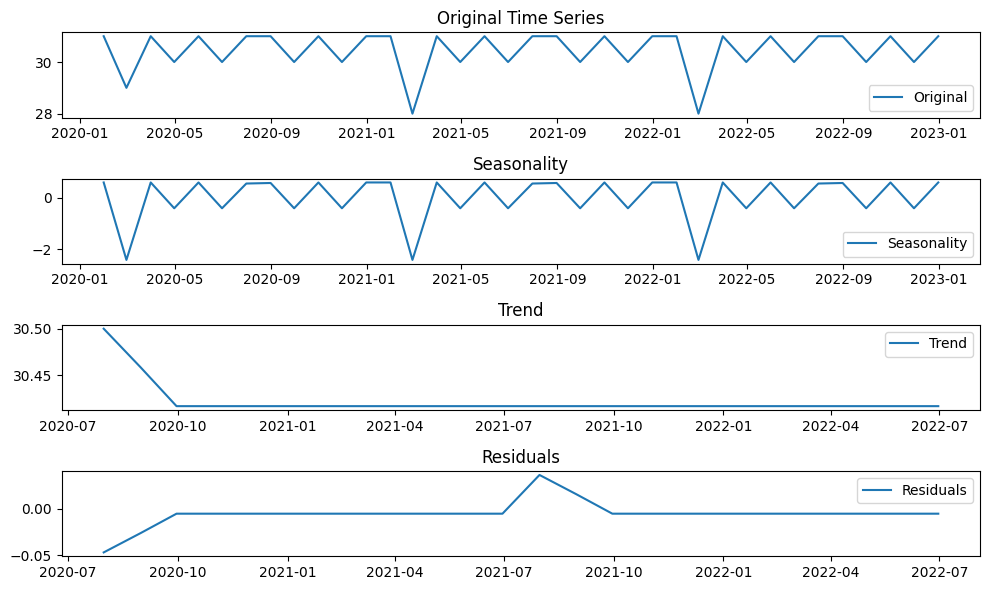

In [58]:
# Plot the original time series, seasonality, trend, and residuals
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(seasonality, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

# **Quantitative Forecasting**

In [63]:
# Split the data into training and testing sets
train_data = monthly_sales.iloc[:-12]  # Use all except the last 12 months for training
test_data = monthly_sales.iloc[-12:]  # Use the last 12 months for testing

In [64]:
# Apply Exponential Smoothing
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

In [65]:
# Forecast future sales
forecast = fitted_model.forecast(steps=12)


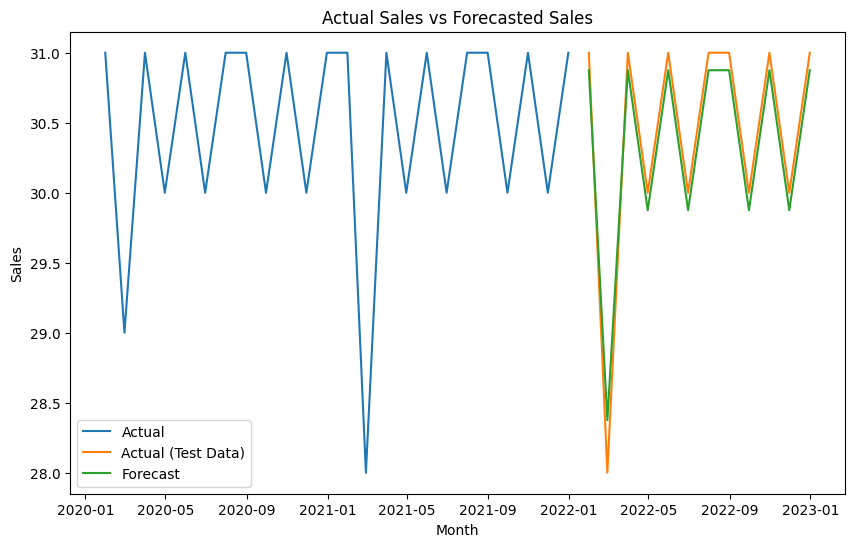

In [66]:
# Plot the actual sales and forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Actual')
plt.plot(test_data.index, test_data, label='Actual (Test Data)')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Actual Sales vs Forecasted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

# **Neural Network Classification**

In [ ]:
# Separate features and target variable
X = df.drop('target_variable', axis=1)  # Replace 'target_variable' with the actual column name
y = df['target_variable']  # Replace 'target_variable' with the actual column name

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Replace 1 with the number of classes for multi-class classification

In [72]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')